# Project: Investigate TMDb movie data set

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The author always had a big interest in watching movies. As most people did, the author also experienced good and bad movies. But what determines if a movie is considered as good or bad? There could be several factors influencig the quality of a movie, as for example the budget, genre, etc. This little project should help the author to improve his data analytics skills and explore some of the success criteria for movies.

### Questions to answer
<ul>
<li>Which genres are most popular from year to year?</li>
<li>What kinds of properties are associated with movies that have high revenues?</li>
<li>Did movies with higher vote count received a better rating?</li>
<li>What were the most popular produced genres in 2000 compared to 2015?</li>
<li>How did the amount of produced films changed over time?</li>
</ul>

In [116]:
# Using this cell to set up import statements for all of the packages that are considered to be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

"""Changing scientific numbers to numeric numbers"""
#https://stackoverflow.com/questions/38689125/how-to-get-rid-of-pandas-converting-large-numbers-in-excel-sheet-to-exponential
pd.options.display.float_format = '{:.2f}'.format

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [117]:
# Loading the data and having a look at the first few lines
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,137999939.28,1392445892.52
1,76341,tt1392190,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10,2015,137999939.28,348161292.49
2,262500,tt2908446,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.30,2015,101199955.47,271619025.41
3,140607,tt2488496,11.17,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.50,2015,183999919.04,1902723129.80
4,168259,tt2820852,9.34,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.30,2015,174799923.09,1385748801.47


In [118]:
df.info(),
print('-------------')
print('Dataframe contains {} rows and {} columns'.format(df.shape[0],df.shape[1]))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

Now I'm visualizing the data to get a better inderstanding of it's distributions.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E631B8EA58>,
      dtype=object)

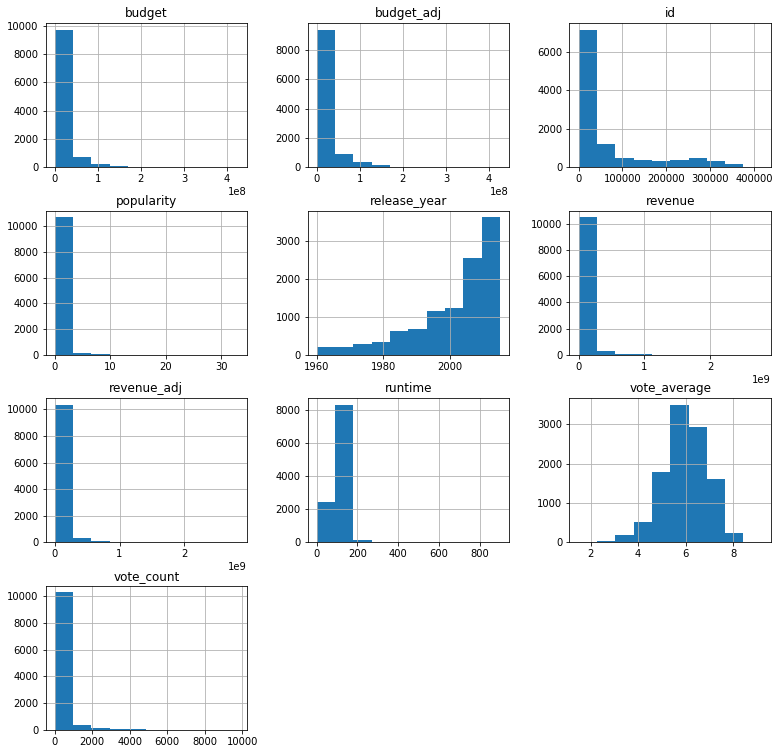

In [119]:
df.hist(figsize=(13,13))


In [120]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00
mean,66064.18,0.65,14625701.09,39823319.79,102.07,217.39,5.97,2001.32,17551039.82,51364363.25
std,92130.14,1.00,30913213.83,117003486.58,31.38,575.62,0.94,12.81,34306155.72,144632485.04
min,5.00,0.00,0.00,0.00,0.00,10.00,1.50,1960.00,0.00,0.00
25%,10596.25,0.21,0.00,0.00,90.00,17.00,5.40,1995.00,0.00,0.00
50%,20669.00,0.38,0.00,0.00,99.00,38.00,6.00,2006.00,0.00,0.00
75%,75610.00,0.71,15000000.00,24000000.00,111.00,145.75,6.60,2011.00,20853251.08,33697095.72
max,417859.00,32.99,425000000.00,2781505847.00,900.00,9767.00,9.20,2015.00,425000000.00,2827123750.41


### Frist impression\n
There are plenty of columns indicating a problem. Many rows seems to contain several values, which are seperated by an \"|\". They need to be cleaned in the first place in order to provide a proper dataset for the intended analysis. The rows containing such values are:
<ul>
<li>cast</li>
<li>director</li>
<li>keywords</li>
<li>genres</li>
<li>production_companies</li>
</ul>
Evenmore, there are columns in the dataset, which are not important to the intended analysis and therefore will be removed by the author. This includes:
<ul>
<li>imdb_id</li>
<li>homepage</li>
<li>overview</li>
<li>release_date</li>
<li>tagline</li>
</ul>

### Dealing with 0 and NaN

df.info( ) revealed that most columns with important content for the analysis, such us revenue, release_year, etc. have a big amount of available data for the analysis. However, the .describe() method, as well as the histogramms, indicate that many columns, especially budget and revenue, contain many "0" in their columns. In order to provide a proper analysis, the columns "budget_adj", "revenue_adj", "budget", "revenue" and "runtime" will change its "0" values into "nan" and the respective colums will be dropped for the analysis.


## Data Cleaning 
In this section the before mentioned \"0\" will be replaced with nan-Values and will be dropped. Then, the rows with several values will be seperated in single columns containing only one value. This is needed in order to perform a proper analysis. Afterwards, unwanted rows for the analysis will be dropped, before the author will perform general data cleaning action as dropping duplicated lines, correct data types, check duplicated entries in some selected columns.


In [121]:
df['revenue_adj'].replace(0, np.NAN, inplace=True)
df['revenue'].replace(0, np.NAN, inplace=True)
df['budget_adj'].replace(0, np.NAN, inplace=True)
df['budget'].replace(0, np.NAN, inplace=True)
df['runtime'].replace(0, np.NAN, inplace=True)

df.dropna(axis=0, inplace=True)

In [122]:
"""Seperating columns with several values, split by an '|', into as many columns as needed"""
#source: https://apassionatechie.wordpress.com/2018/02/24/how-do-i-split-a-string-into-several-columns-in-a-dataframe-with-pandas-python/

df_c = (df['cast'].str.split('|', expand=True).rename(columns=lambda x: f"cast_{x+1}"))
df_d = (df['director'].str.split('|', expand=True).rename(columns=lambda x: f"director_{x+1}"))
df_k = (df['keywords'].str.split('|', expand=True).rename(columns=lambda x: f"keywords_{x+1}"))
df_g = (df['genres'].str.split('|', expand=True).rename(columns=lambda x: f"genres_{x+1}"))
df_p = (df['production_companies'].str.split('|', expand=True).rename(columns=lambda x: f"production_companies_{x+1}"))

#Checking df_c if split was conducted as intended
df_c.head()

,cast_1,cast_2,cast_3,cast_4,cast_5
0,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson
1,Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nicholas Hoult,Josh Helman
2,Shailene Woodley,Theo James,Kate Winslet,Ansel Elgort,Miles Teller
3,Harrison Ford,Mark Hamill,Carrie Fisher,Adam Driver,Daisy Ridley
4,Vin Diesel,Paul Walker,Jason Statham,Michelle Rodriguez,Dwayne Johnson


In [123]:
"""Joining the seperated columns to the original dataframe and
dropping unneeded columns for the analysis"""

df = df.join([df_c, df_d, df_k, df_g, df_p])
df = df.drop(['cast', 'keywords', 'director', 'genres', 'production_companies', 'imdb_id', 'homepage', 'overview', 'release_date', 'tagline'], axis=1)

In [124]:
"""Checking number of duplicates"""
df.duplicated().sum()

0

In [125]:
"""Checking if all rows contain the intended data type"""
df.dtypes

id                          int64
popularity                float64
budget                    float64
revenue                   float64
original_title             object
runtime                   float64
vote_count                  int64
vote_average              float64
release_year                int64
budget_adj                float64
revenue_adj               float64
cast_1                     object
cast_2                     object
cast_3                     object
cast_4                     object
cast_5                     object
director_1                 object
director_2                 object
director_3                 object
director_4                 object
director_5                 object
director_6                 object
keywords_1                 object
keywords_2                 object
keywords_3                 object
keywords_4                 object
keywords_5                 object
genres_1                   object
genres_2                   object
genres_3      

So far the data looks prepared for the analysis, no duplicates have been found, columns containing multiple values have been seperated and data types look ready for analysis. Next, the author will use masks (or queries) to have a deeper look, if some double entries are in specific columns.

In [126]:
df['original_title'].value_counts().head()

Halloween II            2
The Three Musketeers    2
Clash of the Titans     2
The Thing               2
Wanted                  2
Name: original_title, dtype: int64

Since the value_counts() in the title column showed that there may be double entries of movie names, a function "check_double_title" was defined to have a deeper look in the rows with same movie title.

In [127]:
"""Checking column for dubplicated original_title entries"""
limit_4_title = df['original_title'].value_counts().index.tolist()
limit_4_title = limit_4_title[:4]
limit_4_title

limit_4_id = df['original_title'].value_counts().index.tolist()

def check_double_title(names):
    for limit in limit_4_title:
        df_title = df[df['original_title'] == limit]
        print(df_title.iloc[:,:5])
        print("---------------------------------------------------------------------")
        
check_double_title(limit_4_title)

         id  popularity      budget     revenue original_title
1546  24150        0.57 15000000.00 39421467.00   Halloween II
8391  11281        0.56  2500000.00 25533818.00   Halloween II
---------------------------------------------------------------------
          id  popularity      budget      revenue        original_title
3425   52451        1.41 75000000.00 132274484.00  The Three Musketeers
10251  10057        0.79 30000000.00  53898845.00  The Three Musketeers
---------------------------------------------------------------------
         id  popularity       budget      revenue       original_title
1940  18823        2.09 125000000.00 232713139.00  Clash of the Titans
8425  10323        0.20  15000000.00  41092328.00  Clash of the Titans
---------------------------------------------------------------------
         id  popularity      budget     revenue original_title
3472  60935        1.01 35000000.00 28128670.00      The Thing
8890   1091        2.36 10000000.00 13782838.0

In [128]:
print('Dataframe contains {} rows and {} columns'.format(df.shape[0],df.shape[1]))

Dataframe contains 1287 rows and 37 columns


The results show that despite having a same movie title, the movies differ in other columns. Hence, the author implies that there are movies with the same title but different content. Therefore, no more rows need to be dropped. The drop of all rows containing relevant nan-values has led to a big decrease in the dataframe. Now, only 1287 movies will be used for the analysis. This will influence the outcome of the research questions.

<a id='eda'></a>
## Exploratory Data Analysis
Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1: Which genres are most popular from year to year?

In [129]:
# Selecting genres columns for the analysis of the original data frame
df_genres = df.loc[:, 'genres_1': 'genres_5' ]
# Adding release year to df_genres
df_genres_dates = df_genres.join(df['release_year'])

In [130]:
years = df_genres_dates['release_year'].unique() #creates an array of years mentioned in release year 
most_common = [] #creates a list of tuples for most common genres in specific years

#for loop to create most_common list
for year in years:
    #creates df filtered by every year mentioned in years
    a = df_genres_dates[df_genres_dates['release_year'] == year] 
    #drops columns "release_year to perferm stack value count in next line
    b = a.drop(['release_year'], axis = 1)
    #performs value count trough genres_1 - genres_5 and stores the index of maximum count
    c = b.stack().value_counts().idxmax() 

    #creates a masked DataFrame for respective years
    x = df[df['release_year'] == year]
    #creates the mean of vote_average and stores the index of maximum value
    y = x.groupby(['genres_1'])['vote_average'].mean().idxmax()
    if c == y:
        z = 'Equal'
    else:
        z = 'Not equal'
        #appends year with value count trough genres_1 - genres_5, the highest average vote_average and indicates if the resulting columns match
    most_common.append((year, c, y, z))

#creates df for list of tuples named most_common
df_most_popular = pd.DataFrame(most_common, columns=['release_year', 'popular_produced_genre', 'popular_voted_gerne', 'is_equal']).sort_values('release_year').reset_index().drop(['index'], axis=1)
df_most_popular

,release_year,popular_produced_genre,popular_voted_gerne,is_equal
0,1961,Family,Comedy,Not equal
1,1962,Adventure,Adventure,Equal
2,1963,Thriller,Action,Not equal
3,1964,Thriller,Adventure,Not equal
4,1965,Adventure,Adventure,Equal
5,1967,Thriller,Action,Not equal
6,1969,Adventure,Adventure,Equal
7,1971,Thriller,Action,Not equal
8,1972,Drama,Drama,Equal
9,1973,Thriller,Drama,Not equal


In [131]:
df_most_popular['is_equal'].value_counts()

Not equal    41
Equal        10
Name: is_equal, dtype: int64

Only in 11 occasions the most frequent produced genres was also voted as best genre by the users. In all remaining 40 occasions the two values differed.

### Research Question 2: What kinds of properties are associated with movies that have high revenues?


In [132]:
# Creating a copy of the original DataFrame
df_revenue = df

In [133]:
#Performing basic statistic in order to create 4 classifications of the revenue_adj
df_revenue['revenue_adj'].describe()

count         1287.00
mean     199177499.23
std      296851462.45
min             43.00
25%       27648902.20
50%       86747695.58
75%      235117806.64
max     2827123750.41
Name: revenue_adj, dtype: float64

In [134]:
#Bin_edges correspond to min - max entries in previous cell. Quantiles are lables by bin_names.
#new column 'revenue_level' is created to classify columns based on revenues

bin_edges = [2.37,10465848.09,43956661.16,131648235.91,2827123750.41]
bin_names = ['very low' ,'low' ,'medium' ,'high' ] 
df_revenue['revenue_level'] = pd.cut(df_revenue['revenue_adj'], bin_edges, labels=bin_names)

In [135]:
#list of revenue_levels classification is created for loop in next cell
df_revenue['revenue_level'].unique()
revenue_levels = df_revenue['revenue_level'].unique().tolist()
del revenue_levels[-1]

In [136]:
#nested dictionary is created with 8 attributes based on revenue_levels

movie_data = {}

for level in revenue_levels:
    
    #stack.value_counts seciton
    grouped_data = df_revenue[df_revenue['revenue_level'] == level]
        #director
    director = grouped_data.loc[:, 'director_1': 'director_6']
    frequent_director = director.stack().value_counts().idxmax()
        #cast
    cast = grouped_data.loc[:, 'cast_1': 'cast_5']
    frequent_cast = cast.stack().value_counts().idxmax()
        #genres
    genres = grouped_data.loc[:, 'genres_1': 'genres_5']
    frequent_genres = genres.stack().value_counts().idxmax()
        #production companies
    production = grouped_data.loc[:, 'production_companies_1': 'production_companies_5']
    frequent_production = production.stack().value_counts().idxmax()
        #release_year
    release_year = grouped_data['release_year'].value_counts().idxmax()
    
    #average section
    avg_duration = grouped_data['runtime'].mean()
    avg_budget = grouped_data['budget_adj'].mean()
    avg_vote = grouped_data['vote_average'].mean()
    
    #creating nested dictionary
    movie_data[level] = {'avg_duration' : avg_duration, 
                         'frequent_director' : frequent_director, 
                         'avg_budget' : avg_budget, 
                         'avg_vote' : avg_vote,
                        'frequent_cast' : frequent_cast,
                        'frequent_genres' : frequent_genres,
                        'release_year' : release_year,
                        'frequent_production_companies' : frequent_production}

In [137]:
#https://stackoverflow.com/questions/13575090/construct-pandas-dataframe-from-items-in-nested-dictionaryuser_ids = []
#transforming nested dictionary into dataframe

movie_classes = []
frames = []

for movie_class, d in movie_data.items():
    movie_classes.append(movie_class)
    frames.append(pd.DataFrame.from_dict(d, orient='index'))
    
properties = pd.concat(frames, keys=movie_classes)  

properties.columns = ['values']
properties

values
high     avg_duration                               117.54
         frequent_director                Steven Spielberg
         avg_budget                            95442930.57
         avg_vote                                     6.52
         frequent_cast                   Samuel L. Jackson
         frequent_genres                            Action
         release_year                                 2011
         frequent_production_companies  Universal Pictures
low      avg_duration                               105.01
         frequent_director                  John Carpenter
         avg_budget                            25129745.42
         avg_vote                                     6.17
         frequent_cast                       Colin Farrell
         frequent_genres                             Drama
         release_year                                 2011
         frequent_production_companies  Universal Pictures
medium   avg_duration                               107.83
         frequent_director                  John Carpenter
         avg_budget                            39912951.34
         avg_vote                                     6.17
         frequent_cast                       Jason Bateman
         frequent_genres                             Drama
         release_year                                 2011
         frequent_production_companies        Warner Bros.
very low avg_duration                               102.02
         frequent_director                    Rian Johnson
         avg_budget                            10380165.24
         avg_vote                                     5.99
         frequent_cast                          Ellen Page
         frequent_genres                             Drama
         release_year                                 2010
         frequent_production_companies           Lionsgate

The numeric columns of "popularity, budget and vote_count" show the highest correlations.

### Research Question 3: Did movies with higher vote count received a better rating?

In [138]:
#Slice DataFrame to get 2 columns 'vote_count' and 'vote_average'
df_vote = df.loc[:, 'vote_count' : 'vote_average']
#To compare results only entries are considered with more than 2000 votes
df_vote_2000 = df_vote[df_vote['vote_count'] > 2000]

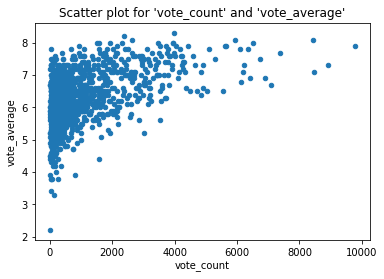

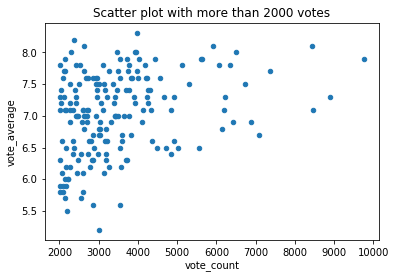

In [139]:

df_vote.plot(x='vote_count', y='vote_average', kind='scatter', title="Scatter plot for 'vote_count' and 'vote_average'")
df_vote_2000.plot(x='vote_count', y='vote_average', kind='scatter', title="Scatter plot with more than 2000 votes")

In [140]:
df_vote.corr()


,vote_count,vote_average
vote_count,1.00,0.46
vote_average,0.46,1.00


In [141]:
df_vote_2000.corr()


,vote_count,vote_average
vote_count,1.00,0.31
vote_average,0.31,1.00


Does not indicate that movies with a higher vote_count receive a higher vote_average. Also by considering columns with more than 2000 vote_count does not change the impression.

### Research Question 4: What were the most popular produced genres in 2000 compared to 2015?

In [142]:
#Creating a Mask for the release_year 2015
df_2015 = df_genres_dates[df_genres_dates['release_year'] == 2015].copy()
#drop release_year
df_2015.drop('release_year',axis=1, inplace=True)
#value_counts across columns
df_2015 = df_2015.stack().value_counts()

In [143]:
#Creating a Mask for the release_year 2000
df_2000 = df_genres_dates[df_genres_dates['release_year'] == 2000].copy()
#drop release_year
df_2000.drop('release_year',axis=1, inplace=True)
#value_counts across columns
df_2000 = df_2000.stack().value_counts()

In [144]:
#Comparing index of both dataframes
df_2015.index.sort_values(),df_2000.index.sort_values()

#Adjusting columns to have a match in columns
df_2000['Animation'] = 0
df_2000['Crime'] = 0
df_2000['History'] = 0
df_2000['Horror'] = 0
df_2000['Music'] = 0
df_2000['Western'] = 0

#Updating DataFrames, sort it by index
df_2015 = df_2015.sort_index()
df_2000 = df_2000.sort_index()

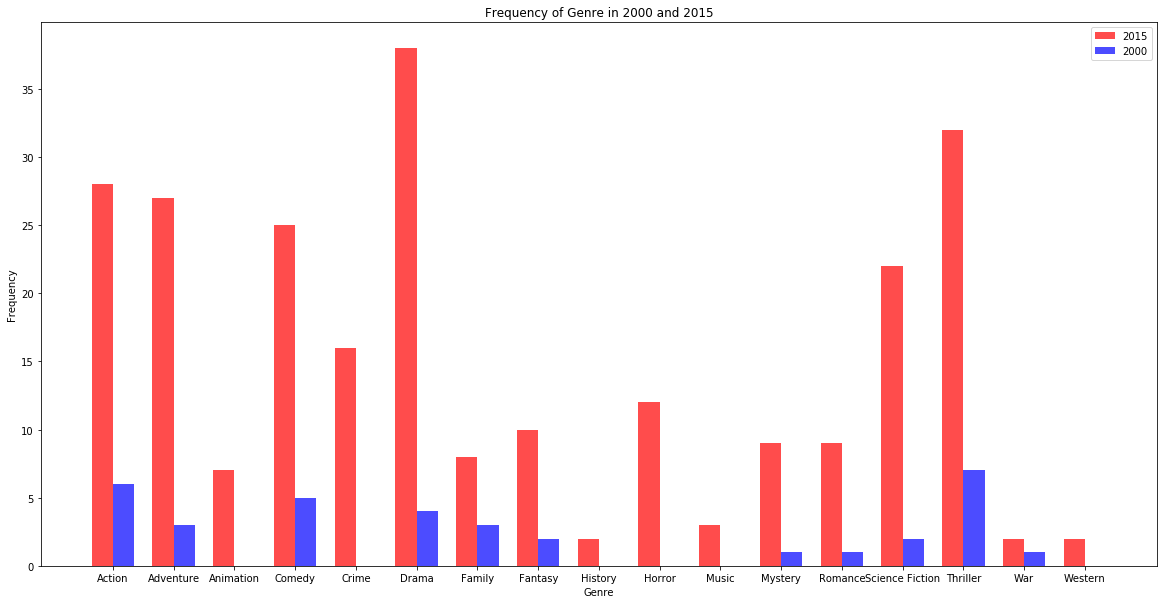

In [146]:
'''Creating a plot with a bar chart with 2 bars'''
labels = df_2000.index.sort_values()
ind = np.arange(len(df_2015))  # the x locations for the groups
width = 0.35       # the width of the bars

# plot bars
red_bars = plt.bar(ind, df_2015, width, color='r', alpha=.7, label='2015')
white_bars = plt.bar(ind + width, df_2000, width, color='b', alpha=.7, label='2000')

# title and labels
plt.ylabel('Frequency')
plt.xlabel('Genre')
plt.title('Frequency of Genre in 2000 and 2015')
locations = ind + width / 2  # xtick locations
labels = labels # xtick labels
plt.xticks(locations, labels)
plt.rcParams["figure.figsize"] = (20,10)
# legend
plt.legend();

Indicate that in the year 2015 dramas were by far the most frequent produced movies, followed by thrillers and action.

### Research Question 5: How did the amount of produced films changed over time?

In [147]:
amount_of_movies = [] #creates a list of tuples for amount of movies

#for loop to create amount_of_movies, years was previously defined
for year in years:
    d = df_genres_dates[df_genres_dates['release_year'] == year] #creates df filtered by every year mentioned in years
    e = len(d.index) #determines the number of rows 
    amount_of_movies.append((year, e)) #appends year with respective number of rows
    
#creates df for list of tuples amount_of_movies
df_amount_of_movies = pd.DataFrame(amount_of_movies, columns=['release_year', 'amount_of_mvies']).sort_values('release_year').reset_index().drop(['index'], axis=1)

,release_year,amount_of_mvies
0,1961,1
1,1962,1
2,1963,1
3,1964,2
4,1965,1
5,1967,1
6,1969,1
7,1971,4
8,1972,1
9,1973,2


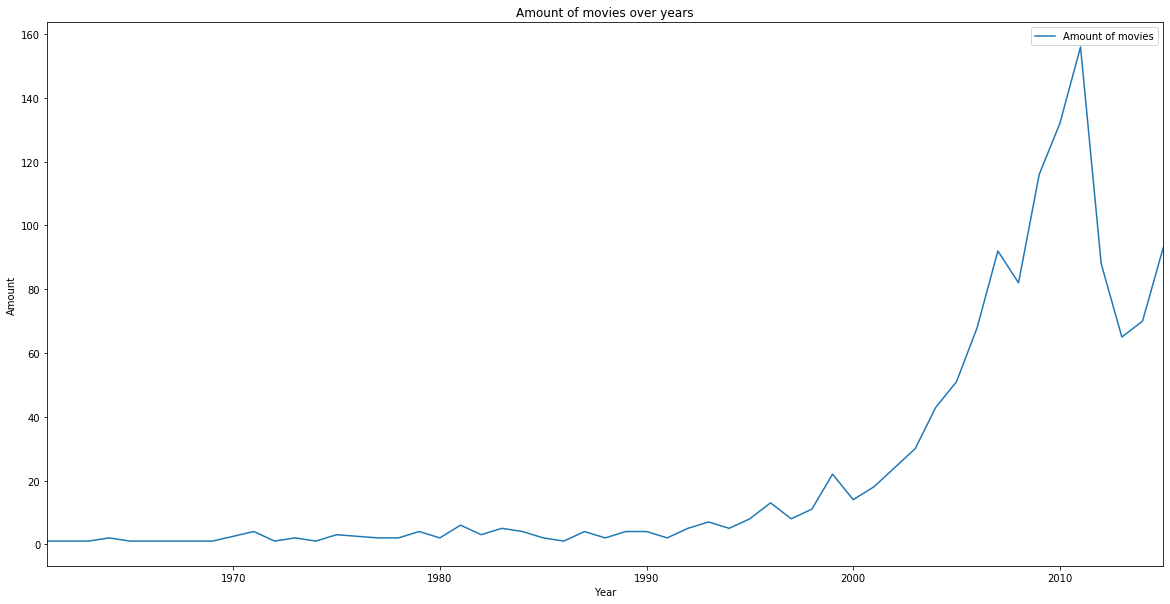

In [148]:
df_amount_of_movies.plot(x='release_year', y='amount_of_mvies', kind='line', figsize=(20,10), title="Amount of movies over years", label="Amount of movies", )
plt.xlabel('Year')
plt.ylabel('Amount');
df_amount_of_movies

Reveals that the amount of produced films significantly increased from 1960 to 2015.

### Conclusions

The first research question "Which genres are most popular from year to year?" has shown surprising results, as the most popular genre differed a lot. To the authors surprise, only in 11 occasions the most frequent produced genres was also voted as best genre by the users. In all remaining 40 occasions the two values differed.

The second research question "What kinds of properties are associated with movies that have high revenues?" shows interesting result. The numeric columns of "popularity, budget and vote_count" show the highest correlations. One can argue that movies with higher budgets are able to receive higher revenues, nevertheless, the correlation is not on a very high level. Vote_count is indicating that the more people vote for a movie, the higher the revenue is. Most probably, this is not a good indicator for high revenue movies. High revenue movies indicate that they are most commonly directed by Matt Damon, cast Tom Cruise as actor and contain the genre Action.

The third research question "Did movies with higher vote count received a better rating?" does not indicate that movies with a higher vote_count receive a higher vote_average. Also by considering columns with more than 2000 vote_count does not change the impression. Furthermore, the corralation does not indicate that higher vote counts result in higher vote averages.

The forth research question "What were the most popular produced genres in 2000 compared to 2015?" indicate that in the year 2015 dramas were by far the most frequent produced movies, followed by thrillers and action. In 2000 the most frequent produced genre was thriller, followed by action and comedies. The bar chart indicates that in 2015 much more movies were produced compared to the year 2000.

The fifth research question "How did the amount of produced films changed over time?" reveals that the amount of produced films significantly increased from 1960 to 2015. Up to 1983 not more than 100 movies were prodcued per year, while in 2014 700 movies were produced. A strong increase in movie production can be obsorved between 1997-2009. One has to consider that the line chart does not show accurate results, as many rows from the original dataset were dropped.

**All results are limited to the underlying data set and as no advaned statistics were performed, the results can only be treated as indicators and are not generalizable. Furthermore, one has to consider that many entries in the dataset have been removed due to missing data.**